## Import stuff

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import random
from PIL import Image
import logging
import time
import sklearn.metrics as metrics


## Load training data from csv


In [8]:
test_data = pd.read_csv("test_distances.csv",index_col=0)


for extractor in ["xl","resnet","clip"]:
    test_data[extractor] = test_data["anchor_left_distance_"+extractor]-test_data["anchor_right_distance_"+extractor]
    test_data.drop("anchor_left_distance_"+extractor, axis=1, inplace=True)
    test_data.drop("anchor_right_distance_"+extractor, axis=1, inplace=True)


X_test = np.array(test_data.iloc[:, :].values,  dtype=float)


print("X shape: ", X_test.shape)


test_data

X shape:  (59544, 3)


,xl,resnet,clip
0,-0.455246,-0.387848,-0.233859
1,1.258042,1.124368,1.032445
2,0.501458,0.257827,0.508484
3,0.187634,0.262590,0.610210
4,-0.196330,-0.583868,-0.354549
...,...,...,...
59539,0.067459,0.010579,-0.103001
59540,0.577511,0.200093,0.246302
59541,-0.547145,-0.351366,-0.557946
59542,-0.292039,-0.204669,-0.150589


# weighted ensemble
the weights would be kinda hard to estimate in practice, it would take a few server submissions. I just made the worse 2 models less important

In [9]:
pred = []
for row in X_test:
    score_left = 0.5*row[0]+row[1]+row[2]
    pred.append(score_left<0)


In [10]:
pred = np.array(pred, dtype=int)
pred

array([1, 0, 0, ..., 1, 1, 0])

In [11]:
np.savetxt("submission.txt", pred, delimiter="\n", fmt="%d")

In [12]:
#invert it 
pred = 1-pred
pred

array([0, 1, 1, ..., 0, 0, 1])

In [13]:
np.savetxt("submission.txt", pred, delimiter="\n", fmt="%d")

# Majority vote
performs worse

In [ ]:
# pred = []
# for row in X_test:
#     score_left = 0
#     score_left += row[0]>0
#     score_left += row[1]>0
#     score_left += row[2]>0
#     score_left += row[3]>0
#     score_left += row[4]>0
#     pred.append(0 if score_left>2 else 1)

# pred = np.array(pred)
# accuracy = metrics.accuracy_score(Y_test, pred<0.5)
# accuracy

# Miss-classified triplets

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

test_triplets = np.loadtxt('./test_triplets_split.txt', dtype=str,delimiter = ' ')

In [ ]:
id=85

id: 98 model predicted: -0.9204138 label: left


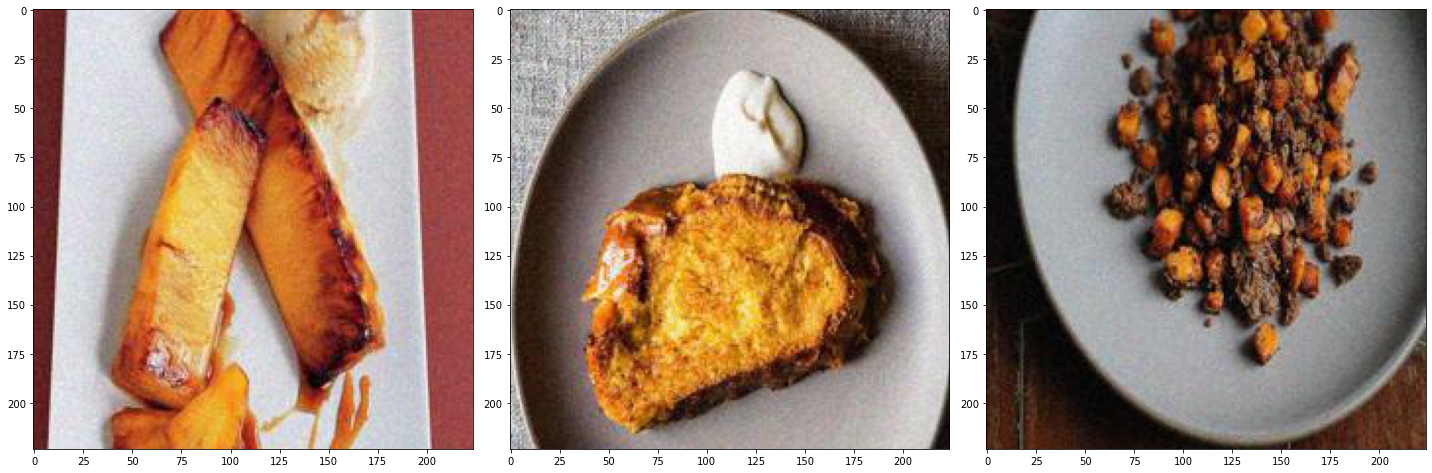

In [ ]:
while True:
    #find next triplet that was missclassified, and plot it
    id+=1
    if pred[id] == Y_test[id]:
        anchor = Image.open('food_224/' + test_triplets[id][0] + '.jpg')
        left = Image.open('food_224/' + test_triplets[id][1] + '.jpg')
        right = Image.open('food_224/' + test_triplets[id][2] + '.jpg')
        row = X_test[id]
        score_left = 0.5*row[0]+row[1]+row[2]+0.5*row[3]
        print("id: " + str(id) + " model predicted: " + str(score_left) + " label: " + ("left" if Y_test[id]==0 else "right"))
        plotImages([anchor, left, right])
        break
        
